In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq
from scipy.signal import find_peaks
from scipy.signal import hann

In [53]:
df = pd.read_csv('data1.csv')

In [54]:
print(df)

      Unnamed: 0  table                             _time        lat  \
0              0      0  2023-05-25 12:04:47.673000+00:00  40.447720   
1              1      0  2023-05-25 12:04:47.685000+00:00  40.447720   
2              2      0  2023-05-25 12:04:47.694000+00:00  40.447720   
3              3      0  2023-05-25 12:04:47.705000+00:00  40.447720   
4              4      0  2023-05-25 12:04:47.709000+00:00  40.447720   
...          ...    ...                               ...        ...   
2960        2960      3  2023-05-25 12:04:07.073000+00:00  40.447975   
2961        2961      3  2023-05-25 12:04:07.092000+00:00  40.447975   
2962        2962      3  2023-05-25 12:04:07.105000+00:00  40.447975   
2963        2963      3  2023-05-25 12:04:07.141000+00:00  40.447975   
2964        2964      3  2023-05-25 12:04:07.237000+00:00  40.447975   

           lng  pos        Ax        Ay        Az   S0   S1   S2     Mod_A  
0    -3.784163    1 -0.230469  0.433594 -0.046875  737  88

In [55]:
# Función para convertir la cadena de fecha y hora en datetime
def convert_to_datetime(date_str):
    date_part, tz_part = date_str.split('+')
    if '.' not in date_part:
        date_part += '.000000'
    return pd.to_datetime(date_part + '+' + tz_part, format='%Y-%m-%d %H:%M:%S.%f%z')

# Convertir la columna '_time' a objetos datetime
df['_time'] = df['_time'].apply(convert_to_datetime)

# Paso 1: Extraer la columna 'Mod_A'
modulo_aceleracion = df['Mod_A'].values


In [56]:
# Paso 2: Calcular la FFT del módulo de la aceleración
fft_result = fft(modulo_aceleracion)

In [57]:
# Paso 3: Calcular las frecuencias correspondientes
n = len(modulo_aceleracion)
deltas_tiempo = df['_time'].diff()
tiempo_muestreo_sec = deltas_tiempo.mean()
frequencies = fftfreq(n, d=tiempo_muestreo_sec.total_seconds())
positive_frequencies = frequencies > 0
frequencies = frequencies[positive_frequencies]
fft_result = fft_result[positive_frequencies]

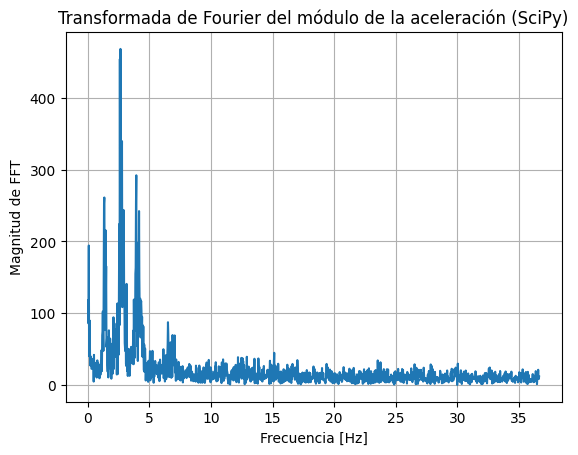

In [58]:
# Graficar la magnitud de la FFT
plt.plot(frequencies, np.abs(fft_result))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud de FFT')
plt.title('Transformada de Fourier del módulo de la aceleración (SciPy)')
plt.grid(True)
plt.show()


In [59]:
# Paso 4: Identificar los picos de la FFT
picos_positivos, _ = find_peaks(np.abs(fft_result), height=250)  # Encontrar picos con una altura mínima


In [60]:
# Mostrar las frecuencias y magnitudes de los picos
for indice_pico in picos_positivos:
    print(f"Frecuencia del pico: {frequencies[indice_pico]:.2f} Hz, Magnitud del pico: {np.abs(fft_result)[indice_pico]:.2f}")

Frecuencia del pico: 3.93 Hz, Magnitud del pico: 292.15
Frecuencia del pico: 2.77 Hz, Magnitud del pico: 339.66
Frecuencia del pico: 2.65 Hz, Magnitud del pico: 468.20
Frecuencia del pico: 2.60 Hz, Magnitud del pico: 454.04
Frecuencia del pico: 1.33 Hz, Magnitud del pico: 261.19
